In [1]:
from matplotlib import pyplot as plt
import os
import numpy as np
import pandas as pd
from datetime import *

In [2]:
path="D:\\数模选拔\\data\\"
def readDir(dirPath):
    if dirPath[-1] == '/':
        print ('文件夹路径末尾不能加/')
        return
    allFiles = []
    if os.path.isdir(dirPath):
        fileList = os.listdir(dirPath)
        for f in fileList:
            f = dirPath+'/'+f
            if os.path.isdir(f):
                subFiles = readDir(f)
                allFiles = subFiles + allFiles #合并当前目录与子目录的所有文件路径
            else:
                allFiles.append(f)
        return allFiles
    else:
        return 'Error,not a dir'
date=["20161017","20161018","20161019","20161020","20161021","20161022","20161023","20161024","20161025"]

def psby(lon,lat):
    if abs(lon-114.294)<0.05 and abs(lat-30.552)<0.02:
        return True
    else :return False

dict_values([44, 68, 65, 64, 74, 0])
dict_values([0, 0, 84, 90, 59, 39])
dict_values([50, 65, 78, 66, 60, 35])
dict_values([54, 57, 76, 51, 45, 24])
dict_values([54, 59, 85, 71, 48, 32])
dict_values([50, 33, 87, 57, 54, 39])
dict_values([44, 62, 96, 56, 50, 30])
dict_values([58, 48, 78, 59, 57, 32])
dict_values([61, 77, 88, 75, 61, 35])


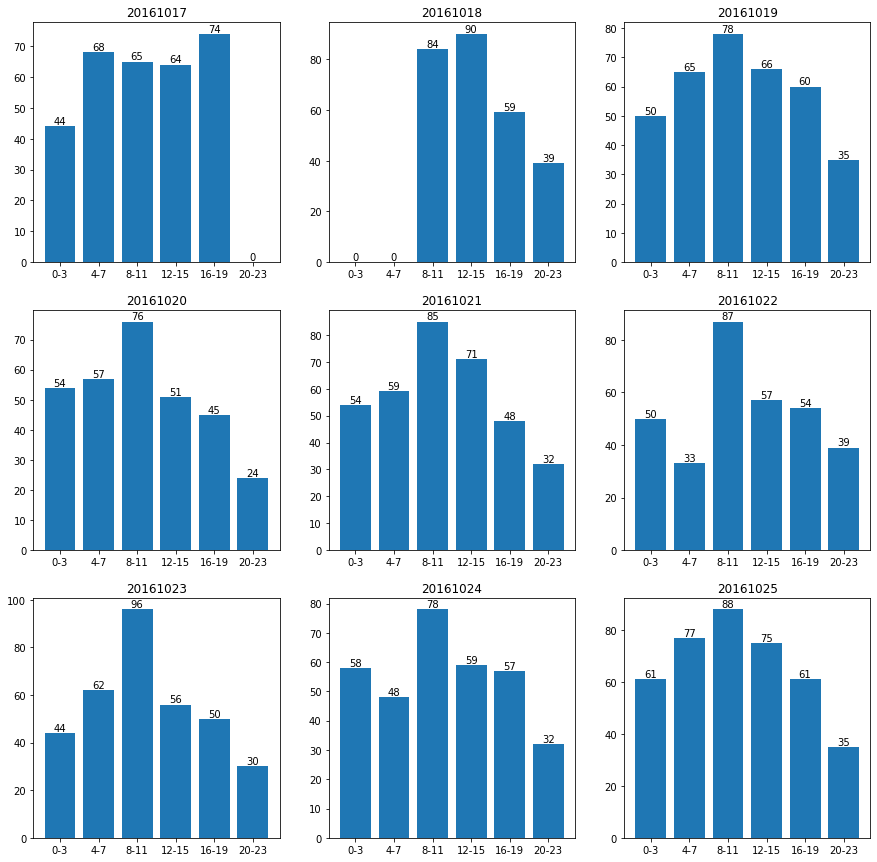

In [3]:
plt.figure(figsize=(15,15))
cnt=1


for day in date:
    fileset=readDir(path+day)
    timetable={0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0,11:0,12:0,13:0,
    14:0,15:0,16:0,17:0,18:0,19:0,20:0,21:0,22:0,23:0}
    sum_time={'0-3':0,'4-7':0,'8-11':0,'12-15':0,'16-19':0,'20-23':0}
    total=0
    for file in fileset:
        data=pd.read_csv(file,sep='\\s+',header=None)
        time=data.loc[:,1]
        lon_now=data.loc[:,3]
        lat_now=data.loc[:,4]
        lon_pre=data.loc[:,5]
        lat_pre=data.loc[:,6]
        t=[]
        for i in time:
            t.append(datetime.strptime(i ,"%H:%M:%S"))
        for i in range(len(time)):
            if psby(lon_now[i],lat_now[i]):
                timetable[t[i].time().hour]+=1
                total+=1
                break
    sum_time['0-3']=timetable[0]+timetable[1]+timetable[2]+timetable[3]
    sum_time['4-7']=timetable[4]+timetable[5]+timetable[6]+timetable[7]
    sum_time['8-11']=timetable[8]+timetable[9]+timetable[10]+timetable[11]
    sum_time['12-15']=timetable[12]+timetable[13]+timetable[14]+timetable[15]
    sum_time['16-19']=timetable[16]+timetable[17]+timetable[18]+timetable[19]
    sum_time['20-23']=timetable[20]+timetable[21]+timetable[22]+timetable[23]
    print(sum_time.values())
    plt.subplot(3,3,cnt)
    plt.bar(sum_time.keys(),sum_time.values())
    for a,b in zip(sum_time.keys(),sum_time.values()):   #柱子上的数字显示
        plt.text(a,b,'%.f'%b,ha='center',va='bottom',fontsize=10)
    plt.title(day)
    cnt+=1

Text(0.5, 1.0, 'GM')

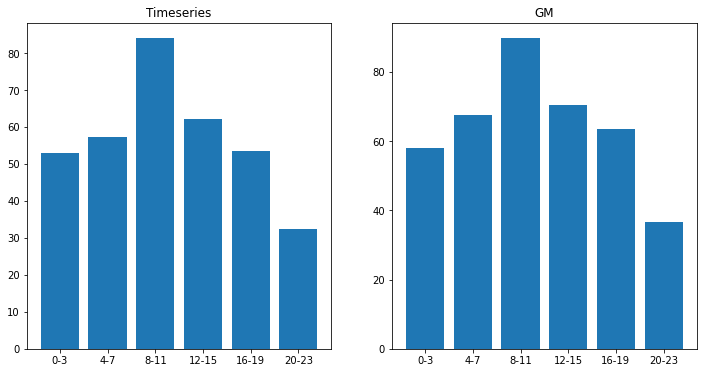

In [4]:
timeseries={'0-3':53.00,'4-7':57.286,'8-11':84.00,'12-15':62.143,'16-19':53.57,'20-23':32.429}
gm={'0-3':57.99,'4-7':67.61,'8-11':89.73,'12-15':70.48,'16-19':63.62,'20-23':36.59}
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.bar(timeseries.keys(),timeseries.values())
plt.title('Timeseries')
plt.subplot(1,2,2)
plt.bar(gm.keys(),gm.values())
plt.title('GM')